# Tutorial 1:  Basic Usage of the Selective Knockoff Filter

This tutorial demonstrates a basic usage example of the Selective Knockoff Filter (SKF) to test for interactions with binary covariates.

In [1]:
set.seed(2022)

## Load a toy example data set

In [2]:
suppressMessages(library(tidyverse))
source("../i-modelx/skf.R")

# Load the simulated data set
ifile <- "data/data_n2000_p100_a400-0_i2_delta5_linear_glmnet_b1.txt"
data <- read_delim(ifile, delim=" ", col_types=cols())
X <- select(data, starts_with("X_")) %>% data.matrix()
Y <- select(data, starts_with("Y")) %>% data.matrix() %>% as.numeric()
Z <- select(data, starts_with("Z_")) %>% data.matrix()

# Load the knockoff variables
ifile <- "data/knockoffs_n2000_p100_a400-0_i2_delta5_linear_glmnet_b1.txt"
Xk <- read_delim(ifile, delim=" ", col_types=cols()) %>% select(starts_with("Xk")) %>% data.matrix()

# Load the ground-truth individual treatment effects
ifile <- "data/ite_n2000_p100_a400-0_i2_delta5_linear_glmnet_b1.txt"
ite.data <- read_delim(ifile, delim=" ", col_types=cols()) %>% data.matrix()
ite <- ite.data

# Print basic information about the data
cat(sprintf("This data set contains %d observations of %d binary explanatory variables and %d covariates.\n", length(Y), ncol(X), ncol(Z)))

This data set contains 2000 observations of 20 binary explanatory variables and 80 covariates.


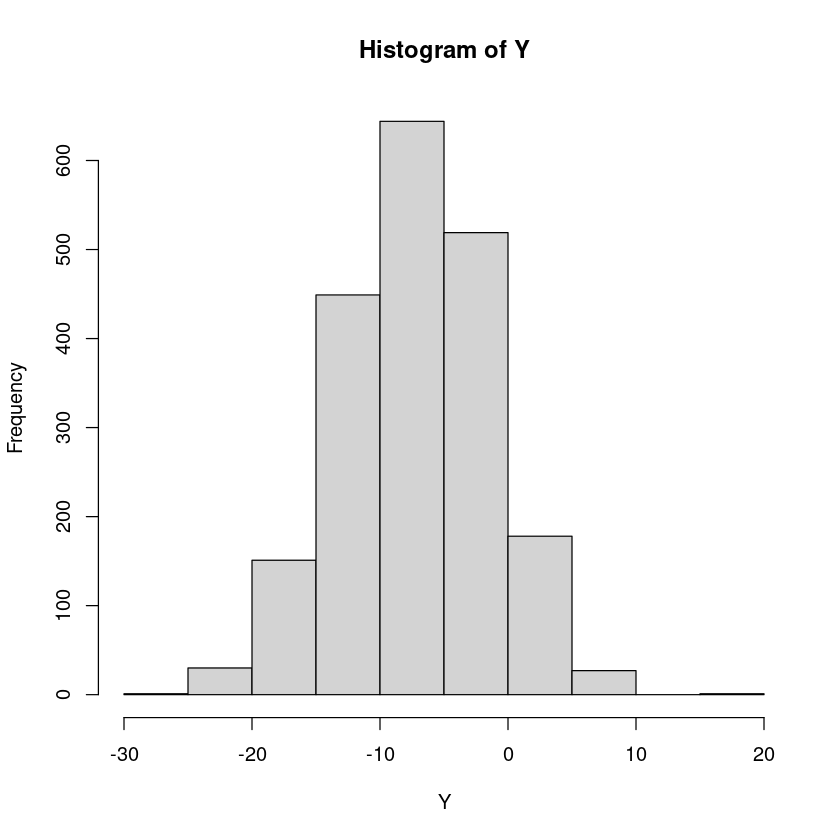

In [3]:
hist(Y)

## Apply the Selective Knockoff Filter

To apply the selective knockoff filter to test for interactions, we begin by specifying which covariates are allowed to interact with the explanatory variables.
In this example, we consider only interactions between the explanatory variables and the binary covariates.

In [4]:
# The first 60 covariates are continuous
Z.noint <- Z[,1:60]

# The remaining 20 covariates are discrete
Z.int <- Z[,61:ncol(Z)]

Below, we apply the SKF at the nominal 10\% FDR level to detect and test up to 2 different interactions per variable.

In [5]:
res.skf <- skf_analysis(Y, X, Xk, Z.noint, Z.int, ite=ite, family = "gaussian", fdr.nominal=0.1, fdr.offset=1,
                        naive=FALSE, split=FALSE, vanilla=FALSE, cross.prior=TRUE, num.int=2, verbose=FALSE)

`summarise()` has grouped output by 'variable', 'covariate'. You can override
using the `.groups` argument.


## Evaluate the discoveries

Using our knowledge of the ground-truth individual treatment effects, we can measure the performance of the SKF in terms of power, false discovery proportion (FDP), and homogeneity of the tested hypotheses.

In [6]:
discoveries.skf <- res.skf$discoveries
hypotheses.skf <- res.skf$hypotheses
evaluate_results(discoveries.skf, hypotheses.skf)

Offset,FDP,Causal.prop,Beta.sd,Power,True,Discoveries
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09090909,0.9090909,0,1,10,11


The full list of discoveries reported by the SKF is:

In [7]:
discoveries.skf

Offset,Variable,Partition,W,Label
<dbl>,<int>,<int>,<dbl>,<chr>
1,1,4,1.8782197,Z_61 : 1; Z_68 : 1
1,2,4,1.6765810,Z_63 : 1; Z_79 : 1
1,3,4,1.7194466,Z_71 : 1; Z_61 : 1
1,4,4,1.2458230,Z_74 : 1; Z_66 : 1
1,7,4,1.5211617,Z_77 : 1; Z_63 : 1
1,11,4,1.6683667,Z_69 : 1; Z_77 : 1
1,13,4,1.4680500,Z_78 : 1; Z_75 : 1
1,13,2,0.2852935,Z_78 : 0; Z_75 : 1
1,14,4,1.1919779,Z_67 : 1; Z_75 : 1


The full list of hypotheses tested by the SKF is:

In [8]:
hypotheses.skf

Variable,Variables,Partition,Label,Null,Causal.prop,Beta.sd,n.sub
<int>,<chr>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<int>
1,"Z_61, Z_68",1,Z_61 : 0; Z_68 : 0,TRUE,0,0,481
1,"Z_61, Z_68",2,Z_61 : 0; Z_68 : 1,TRUE,0,0,487
1,"Z_61, Z_68",3,Z_61 : 1; Z_68 : 0,TRUE,0,0,511
1,"Z_61, Z_68",4,Z_61 : 1; Z_68 : 1,FALSE,1,0,521
2,"Z_63, Z_79",1,Z_63 : 0; Z_79 : 0,TRUE,0,0,492
2,"Z_63, Z_79",2,Z_63 : 0; Z_79 : 1,TRUE,0,0,522
2,"Z_63, Z_79",3,Z_63 : 1; Z_79 : 0,TRUE,0,0,473
2,"Z_63, Z_79",4,Z_63 : 1; Z_79 : 1,FALSE,1,0,513
3,"Z_71, Z_61",1,Z_71 : 0; Z_61 : 0,TRUE,0,0,472
